In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

In [2]:
orders = pd.read_csv('../datasets/orders.csv')
oi = pd.read_csv('../datasets/order_items.csv')
op = pd.read_csv('../datasets/order_payments.csv')
cust = pd.read_csv('../datasets/customers.csv')
prod = pd.read_csv('../datasets/products.csv')

# Data Cleaning

In [47]:
# Converter a coluna da data em Datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# Criar coluna de mês e ano
orders['month_num'] = orders['order_purchase_timestamp'].apply(lambda x: str(x.month))
orders['month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime("%B"))
orders['month/year'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime("%b/%Y"))
orders['year'] = orders['order_purchase_timestamp'].apply(lambda x: str(x.year))
# Proporção de vendas por período
orders_period = orders['month/year'].value_counts()
periods = orders_period.index.to_list()
# Gera um novo dadaset
orders_by_period = orders.groupby('month/year').count().reset_index()
orders_by_period['month/year'] = pd.to_datetime(orders_by_period['month/year'], format='%b/%Y')
orders_by_period['month/Year'] = orders_by_period['month/year'].apply(lambda x: x.strftime("%b/%Y")) 
orders_by_period = orders_by_period[['month/year', 'month/Year', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'month_num', 'month_name', 'year']]
orders_by_period = orders_by_period.sort_values('month/year', ascending=True)

In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_num,month_name,month/year,year,period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,October,Oct/2017,2017,October/2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7,July,Jul/2018,2018,July/2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,August,Aug/2018,2018,August/2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,11,November,Nov/2017,2017,November/2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2,February,Feb/2018,2018,February/2018


# Você sente que precisa aprofundar as análises para a nova CEO.    


## Então gere alguns gráficos que analisem…

- A proporção de vendas por estado
- A proporção de vendas por mês (data do pedido)
- A proporção de vendas por ano/mês (data do pedido)
- A evolução de vendas ao longo de anos e meses

### Proporção de vendas por estado

In [15]:
order_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   month_num                      99441 non-null  object        
 9   month_name                     99441 non-null  object        
 10  month/year                     99441 non-null  object        
 11  year           

<Axes: xlabel='count', ylabel='customer_state'>

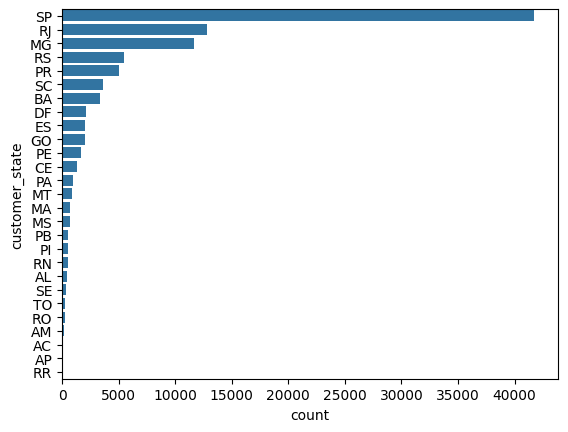

In [20]:
# faz o join da base de pedidos com clientes para obter os estados
order_customers = pd.merge(orders, cust, on='customer_id', how='left')

#order_customers.info()
#plt.bar(order_customers['customer_state'], order_customers['order_id'].count())
state_counts = order_customers['customer_state'].value_counts()
states = state_counts.index.to_list()
sns.countplot(order_customers['customer_state'], order=states, )


(<Axes: xlabel='year', ylabel='customer_state'>,
 year             2016     2017     2018
 customer_state                         
 AC                NaN     54.0     27.0
 AL                2.0    207.0    204.0
 AM                NaN     75.0     73.0
 AP                NaN     29.0     39.0
 BA                4.0   1592.0   1784.0
 CE                8.0    660.0    668.0
 DF                6.0    921.0   1213.0
 ES                4.0    968.0   1061.0
 GO                9.0    955.0   1056.0
 MA                4.0    387.0    356.0
 MG               40.0   5414.0   6181.0
 MS                NaN    301.0    414.0
 MT                3.0    420.0    484.0
 PA                4.0    504.0    467.0
 PB                1.0    260.0    275.0
 PE                7.0    772.0    873.0
 PI                1.0    226.0    268.0
 PR               20.0   2270.0   2755.0
 RJ               56.0   6225.0   6571.0
 RN                4.0    234.0    247.0
 RO                NaN    141.0    112.0
 RR     

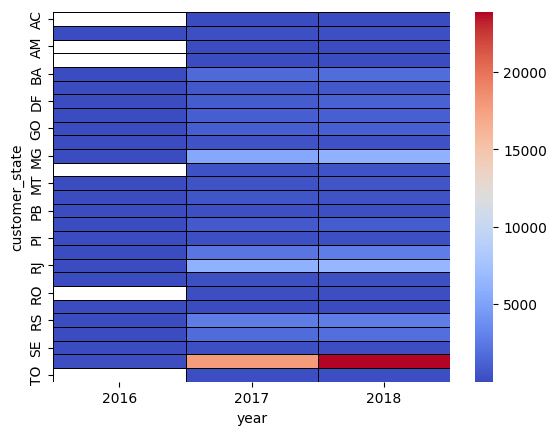

In [35]:
oc = order_customers.groupby(['customer_state', 'year']).agg({'order_id':'count'}).sort_values('order_id', ascending=False).reset_index()

oc.columns=['customer_state', 'year', 'orders']
#sns.histplot(oc, x='customer_state', y='order_id', hue='year')
oc_corr = oc.pivot_table(values='orders', index='customer_state', columns='year')
sns.heatmap(oc_corr, cmap='coolwarm', linecolor='black', linewidths=0.5), oc_corr

### A proporção de vendas por mês (data do pedido)

<Axes: xlabel='count', ylabel='month_name'>

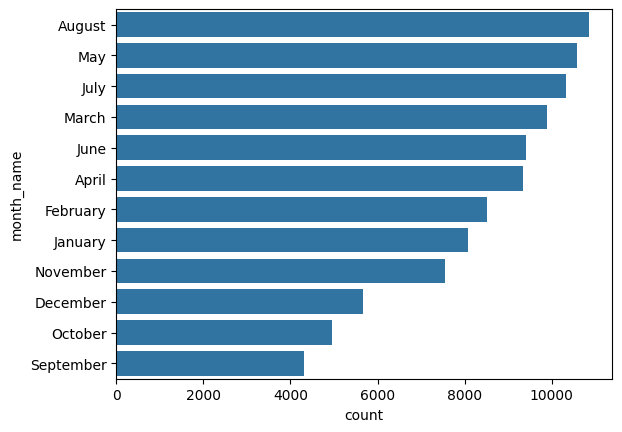

In [46]:
orders_month = orders['month_name'].value_counts()
months = orders_month.index.to_list()
sns.countplot(orders['month_name'], order=months)

### A proporção de vendas por ano/mês (data do pedido)

<Axes: xlabel='year', ylabel='month_name'>

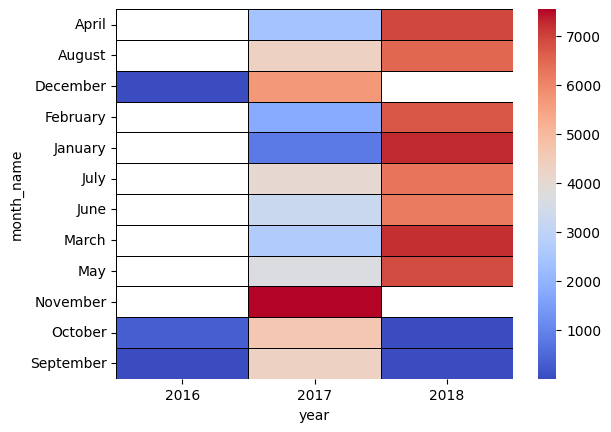

In [40]:
oc = order_customers.groupby(['month_name', 'year']).agg({'order_id':'count'}).sort_values('order_id', ascending=False).reset_index()

oc.columns=['month_name', 'year', 'orders']
#sns.histplot(oc, x='customer_state', y='order_id', hue='year')
oc_corr = oc.pivot_table(values='orders', index='month_name', columns='year')
sns.heatmap(oc_corr, cmap='coolwarm', linecolor='black', linewidths=0.5)

<BarContainer object of 25 artists>

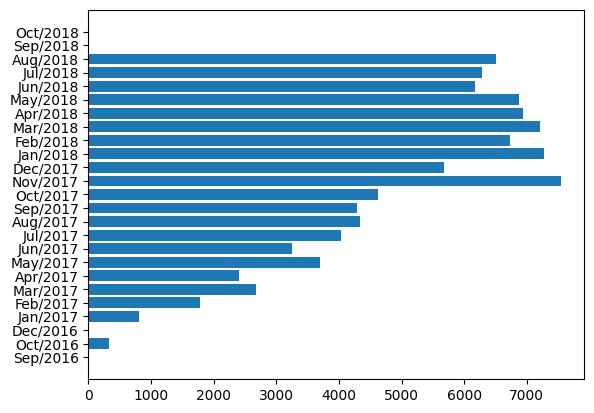

In [44]:
plt.barh(orders_by_period['month/Year'], orders_by_period['order_id'])

<BarContainer object of 25 artists>

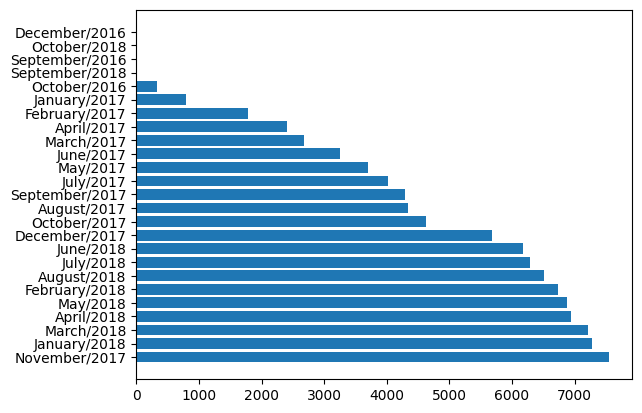

In [43]:
plt.barh(periods, orders_period)

### A evolução de vendas ao longo de anos e meses

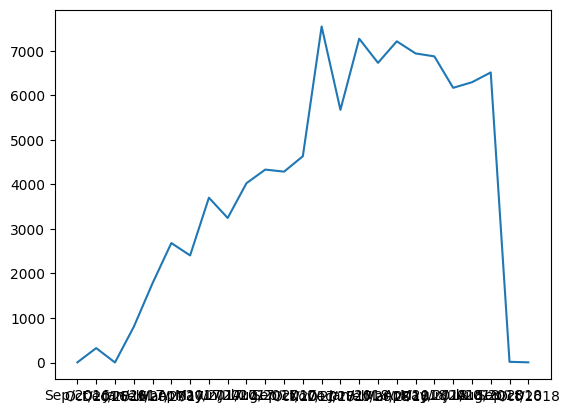

In [34]:
orders_by_period
plt.plot(orders_by_period['month/Year'], orders_by_period['order_id'])

## …e que respondam às seguintes perguntas:

- O custo do frete está relacionado com o valor do bem comprado? - Não
- Existe uma preferência de meio de pagamento de acordo com o valor do pagamento?
- O peso e o volume do produto comprado têm relação com valor do frete?
- O peso e o volume do produto comprado têm relação com o tempo de entrega?

In [54]:
oi.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


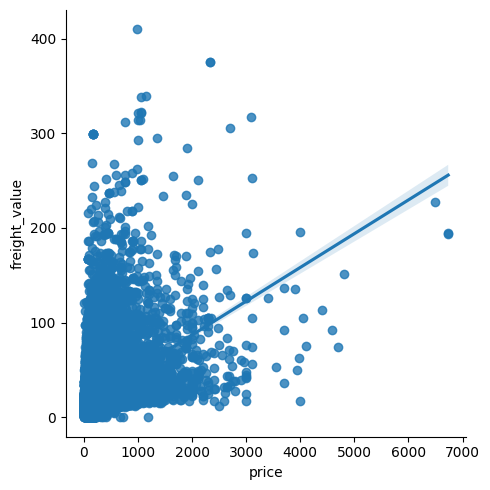

In [53]:
sns.lmplot(oi, x='price', y='freight_value')

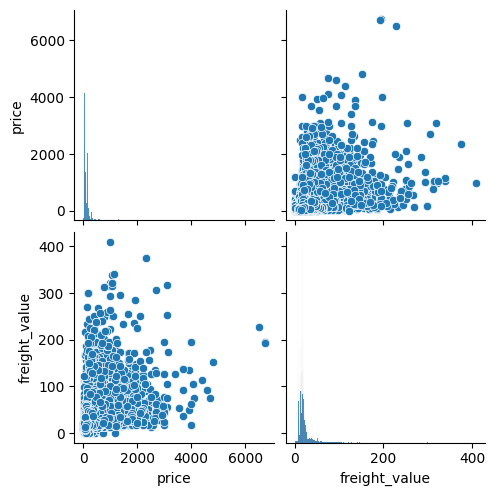

In [52]:
price_freight = oi[['price', 'freight_value']]
sns.pairplot(price_freight, )

# Existe uma preferência de meio de pagamento de acordo com o valor do pagamento?

In [74]:
op.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [75]:
df2 = pd.merge(oi, op, how='left', on='order_id')
df2 = df2[['order_id', 'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type','payment_value']]
df3 = pd.merge(df2, orders, how='left', on='order_id')
df3 = df3[['order_id', 'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type','payment_value','order_estimated_delivery_date']]

In [129]:
df3['payment_type'].value_counts()

payment_type
credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: count, dtype: int64

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   order_item_id                  117604 non-null  int64  
 2   product_id                     117604 non-null  object 
 3   price                          117604 non-null  float64
 4   freight_value                  117604 non-null  float64
 5   payment_type                   117601 non-null  object 
 6   payment_value                  117601 non-null  float64
 7   order_estimated_delivery_date  117604 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 7.2+ MB


<Axes: ylabel='payment_type'>

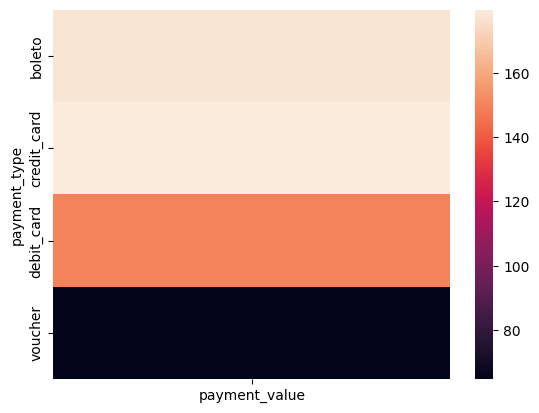

In [92]:
df3_corr = df3.pivot_table(values='payment_value', index='payment_type')
sns.heatmap(df3_corr)

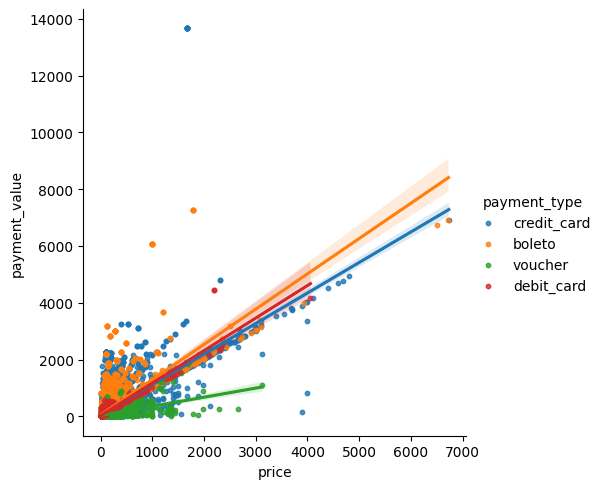

In [97]:
sns.lmplot(df3, x='price', y='payment_value', hue='payment_type', scatter_kws={'s':10})

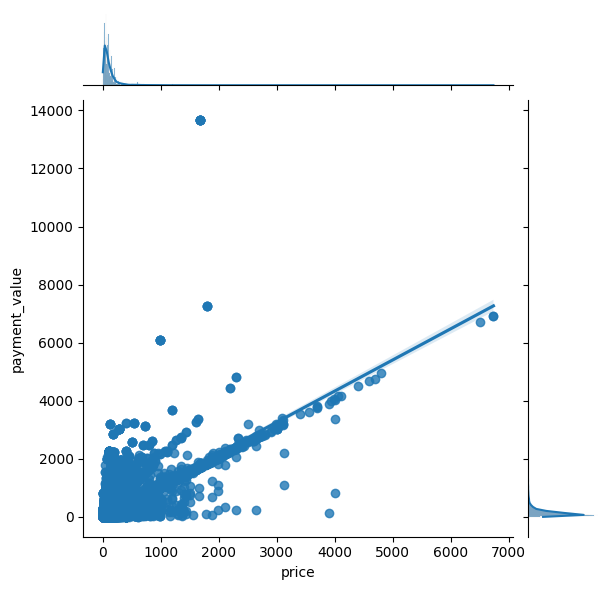

In [89]:
sns.jointplot(df3, x='price', y='payment_value', kind='reg')

# - O peso e o volume do produto comprado têm relação com valor do frete?

In [102]:
df4 = pd.merge(df3, prod, how='left', on='product_id')

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'payment_type', 'payment_value', 'order_estimated_delivery_date',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

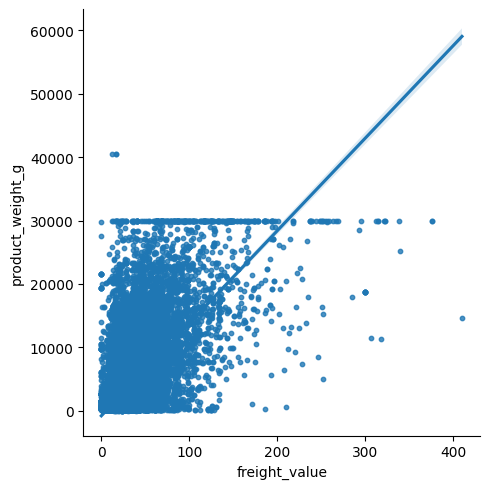

In [108]:
sns.lmplot(df4, x='freight_value', y='product_weight_g', scatter_kws={'s':10})

In [105]:
df4[['freight_value', 'product_weight_g']].corr()

,freight_value,product_weight_g
freight_value,1.000000,0.611861
product_weight_g,0.611861,1.000000


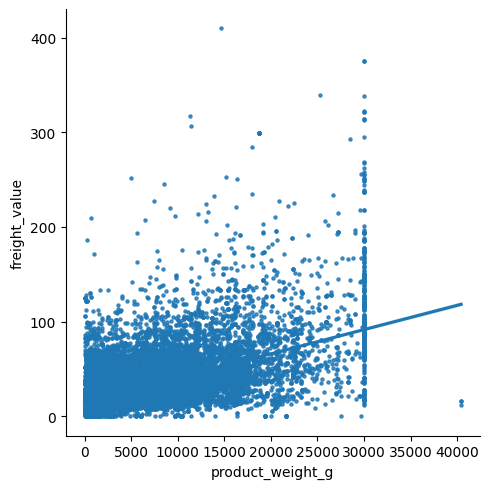

In [109]:
sns.lmplot(df4, x='product_weight_g', y='freight_value', scatter_kws={'s':5})

In [114]:
df4[df4['product_weight_g'] == 30000]['product_category_name'].value_counts()

product_category_name
beleza_saude                                      61
utilidades_domesticas                             45
esporte_lazer                                     39
moveis_sala                                       22
pet_shop                                          21
moveis_decoracao                                  21
moveis_escritorio                                 14
moveis_cozinha_area_de_servico_jantar_e_jardim    12
casa_construcao                                   10
cool_stuff                                         9
ferramentas_jardim                                 7
bebes                                              7
automotivo                                         6
construcao_ferramentas_construcao                  4
brinquedos                                         3
eletrodomesticos                                   3
cama_mesa_banho                                    3
industria_comercio_e_negocios                      3
instrumentos_musicais   

In [123]:
df4[(df4['product_weight_g'] == 30000) & (df4['freight_value'] == df4['freight_value'].max())]

,order_id,order_item_id,product_id,price,freight_value,payment_type,payment_value,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [122]:
df4[df4['freight_value'] == df4['freight_value'].max()]

,order_id,order_item_id,product_id,price,freight_value,payment_type,payment_value,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
76769,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,979.0,409.68,credit_card,1388.68,2018-05-17 00:00:00,bebes,44.0,385.0,6.0,14675.0,55.0,64.0,52.0


In [128]:
df4[df4['payment_value'] > (df4['price'] + df4['freight_value'])]

,order_id,order_item_id,product_id,price,freight_value,payment_type,payment_value,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,boleto,34.59,2017-06-06 00:00:00,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,49.90,13.37,boleto,126.54,2018-03-06 00:00:00,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,49.90,13.37,boleto,126.54,2018-03-06 00:00:00,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
21,000e906b789b55f64edcb1f84030f90d,1,57d79905de06d8897872c551bfd09358,21.99,11.85,credit_card,33.84,2017-12-07 00:00:00,telefonia,59.0,540.0,4.0,300.0,17.0,4.0,12.0
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,27.90,7.94,boleto,35.84,2018-06-20 00:00:00,alimentos,59.0,982.0,1.0,150.0,17.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117593,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,17.90,22.06,boleto,39.96,2018-04-27 00:00:00,cama_mesa_banho,50.0,696.0,2.0,200.0,25.0,5.0,18.0
117594,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,55.00,34.19,boleto,356.76,2017-11-27 00:00:00,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
117595,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,55.00,34.19,boleto,356.76,2017-11-27 00:00:00,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
117596,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,55.00,34.19,boleto,356.76,2017-11-27 00:00:00,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0


0         8
1         1
2         1
3         8
4         2
         ..
103881    1
103882    2
103883    1
103884    5
103885    1
Name: payment_installments, Length: 103886, dtype: int64